# Home Assignment -- 3

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```

Write your theoretical derivations within such blocks:
```markdown
**BEGIN Solution**

<!-- >>> your derivation here <<< -->

**END Solution**
```

## $\LaTeX$ in Jupyter
Jupyter has constantly improving $\LaTeX$ support. Below are the basic methods to
write **neat, tidy, and well typeset** equations in your notebooks:
* to write an **inline** equation use 
```markdown
$ you latex equation here $
```
* to write an equation, that is **displayed on a separate line** use 
```markdown
$$ you latex equation here $$
```
* to write a **block of equations** use 
```markdown
\begin{align}
    left-hand-side
        &= right-hand-side on line 1
        \\
        &= right-hand-side on line 2
        \\
        &= right-hand-side on the last line
\end{align}
```
The **ampersand** (`&`) aligns the equations horizontally and the **double backslash**
(`\\`) creates a new line.

<br/> <!--Intentionally left blank-->

<hr/> <!--Intentionally left blank-->

<h1><center><span style="color:red;">**IMPORTANT NOTICE FOR THIS PART**</span></center></h1>

Before submitting, **please**, make sure that your notebook runs **without errors** in Python 3.6
and **reproduces your solution as intended**, when you **Restart the Kernel and re-run the whole
notebook**!
<span style="color:red;">You will be severely penalized if you notebook does not run.</span>

Where it is possible, your solution will be graded based on **plots**, generated by **your code** on **TA's** laptop.

<hr/> <!--Intentionally left blank-->

<br/> <!--Intentionally left blank-->

# Part 1 (62 pt.): Dimensionality reduction

In this part you are asked to complete a couple of practical tasks and prove an important theoretical result.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

<br/> <!--Intentionally left blank-->

## Task 1 (5 pt.):  A warmup with simple PCA

Here we will remember how to use Principal Component Analysis for artficial data.

### Task 1.1 (2 pt.)

* Load data using `sklearn.datasets.make_blobs` generator ([reference](http://scikit-learn.org/stable/modules/classes.html#samples)). Choose 1000 observations, and 100 dimensions.  
* Visualize data for the first two dimensions and color them according to their class. 
* Apply PCA so that 90% of the variance is explained. Output the number of principal components. 
* Visualize the transformed data for the first 2 components. Is it linearly separable? 
* Apply KernelPCA with RBF kernel with 2 components. Choose `gamma` in order to obtain linear separability. Plot data on first 2 components. 

In [8]:
### BEGIN IMPORTS

import sklearn.datasets as skdats
import matplotlib.cm as colormap
import sklearn.decomposition as skdec
### END IMPORTS

Text(0.5,1,'Data Visalization')

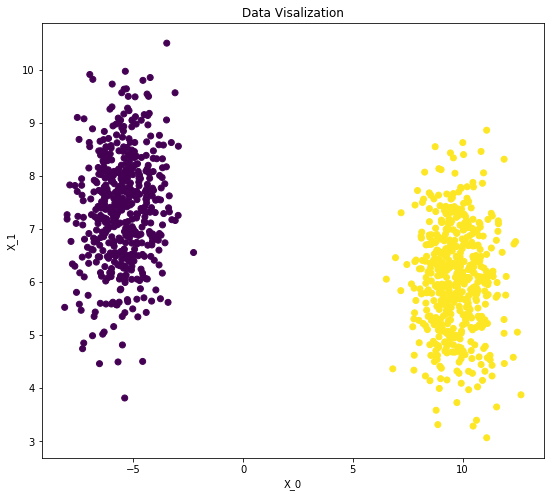

In [16]:
### BEGIN Solution

(X,y) = skdats.make_blobs(n_samples=1000, n_features=100, random_state=5, centers=2) 
#it is not correct to discuss linear separability for more than 2 classes
#so I put also centers=2

#visualizing
f, ax = plt.subplots(figsize=(9,8))

ax.scatter(X[:,0],X[:,1], c=y)
ax.set_xlabel(r"X_0")
ax.set_ylabel(r"X_1")
ax.set_title("Data Visalization")



In [17]:
pcaTransform = skdec.PCA(n_components=2)
pcaTransform.fit(X)
print(pcaTransform.explained_variance_ratio_)


[0.94207842 0.00096082]


Text(0.5,1,'Data Visalization (After PCA)')

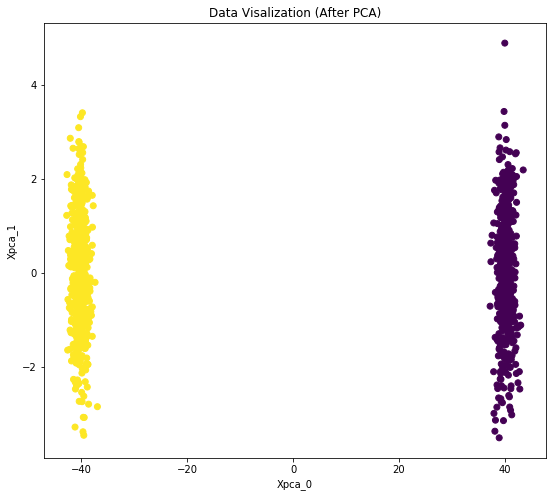

In [39]:
Xpca = pcaTransform.transform(X)
#plot after PCA
f, ax = plt.subplots(figsize=(9,8))

ax.scatter(Xpca[:,0],Xpca[:,1], c=y)
ax.set_xlabel(r"Xpca_0")
ax.set_ylabel(r"Xpca_1")
ax.set_title("Data Visalization (After PCA)")

These classes are linearily separable just by observation.

<br/> <!--Intentionally left blank-->

In [42]:
kpcaTransform = skdec.KernelPCA(n_components=2,kernel="rbf",gamma=0.023)
kpcaTransform.fit(X)
Xkpca = kpcaTransform.transform(X)

Text(0.5,1,'Data Visalization (After KPCA)')

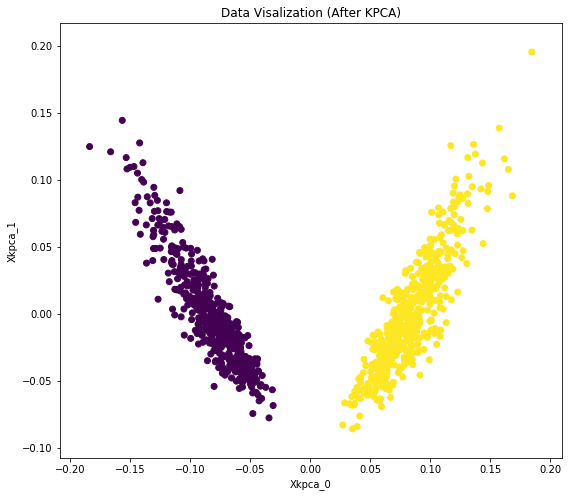

In [43]:
#Plot after KPCA
f, ax = plt.subplots(figsize=(9,8))

ax.scatter(Xkpca[:,0],Xkpca[:,1], c=y)
ax.set_xlabel(r"Xkpca_0")
ax.set_ylabel(r"Xkpca_1")
ax.set_title("Data Visalization (After KPCA)")
### END Solution

### Task 1.2 (3 pt.)

* Load data using `sklearn.datasets.make_circles` generator ([reference](http://scikit-learn.org/stable/modules/classes.html#samples)). Choose 1000 observations, noise=0.1, factor=0.3.
* Visualize the data and color points them according to their class.
* Apply the PCA with 1 principal component. Print and comment on the explained variance ratio.
* Visualize the transformed data for the first principal component. Is it linearly separable? 
* Apply the KPCA with the RBF kernel with 1 component. Select the best `gamma` parameter for the kernel.
    * For this, plot the projection of the data on the first principal component. What is the first `gamma` when data become linearly separable? 

Text(0.5,1,'Data Visalization')

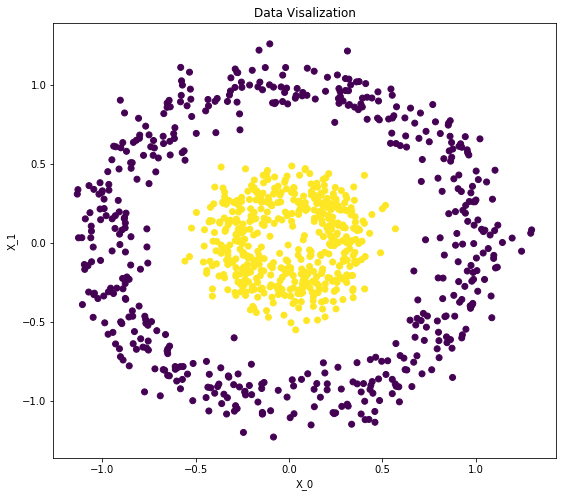

In [44]:
### BEGIN Solution

X,y = skdats.make_circles(n_samples=1000,noise=0.1, factor=0.3, random_state=5)

#visualizing
f, ax = plt.subplots(figsize=(9,8))

ax.scatter(X[:,0],X[:,1], c=y)
ax.set_xlabel(r"X_0")
ax.set_ylabel(r"X_1")
ax.set_title("Data Visalization")



In [57]:
pcaTransformCircles=skdec.PCA(n_components=1)
pcaTransformCircles.fit(X)
Xpca = pcaTransformCircles.transform(X)
print(pcaTransformCircles.explained_variance_ratio_)

[0.50340169]


We try to approximate data with one principal component, it is a line. Mean is located at center, so the total variance is sum of squares of all points. For approximately half of points that are close to the line the distance to line is very small. Points which are closer to orthogonal of principal component has relatively the same distance as to the center. Approximately it gives 50% of reduced variance.

Text(0.5,1,'Data Visalization (After PCA)')

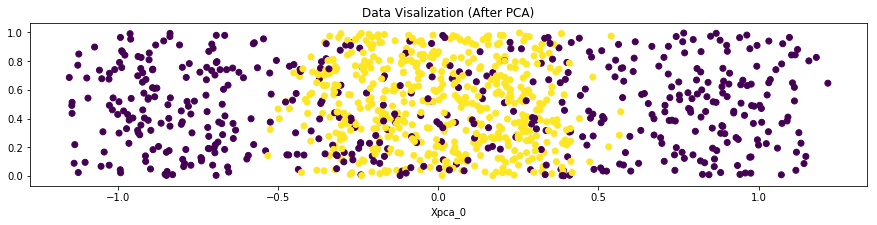

In [94]:
#plot after PCA
f, ax = plt.subplots(figsize=(15,3))

ax.scatter(Xpca[:,0], np.random.uniform(size=Xpca.shape[0]),c=y) #for beauty
ax.set_xlabel(r"Xpca_0")
ax.set_title("Data Visalization (After PCA)")

After PCA we still have not separable sets.

In [101]:
#Apply KPCA
kpcaTransformCircles=skdec.KernelPCA(n_components=1,kernel="rbf",gamma=1.65)
kpcaTransformCircles.fit(X)
Xkpca = kpcaTransformCircles.transform(X)

Text(0.5,1,'Data Visalization (After KPCA)')

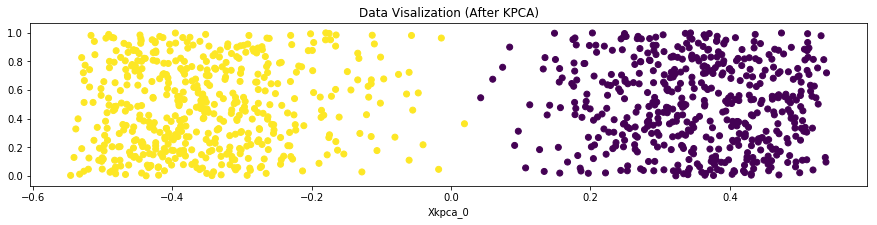

In [102]:
f, ax = plt.subplots(figsize=(15,3))

ax.scatter(Xkpca[:,0], np.random.uniform(size=Xkpca.shape[0]),c=y) # for beauty
ax.set_xlabel(r"Xkpca_0")
ax.set_title("Data Visalization (After KPCA)")
### END Solution

These sets are linearly separable. Empirically, the lowest gamma is about $1.65$. The greater it becomes, the larger the distance between target classes.

<br/> <!--Intentionally left blank-->

## Task 2 (10 pt.):  Manifold learning

Try Kernel PCA, Laplacian Eigenmaps, Locally Linear Embedding and Isomap to find the best representation of 3D Datasets composed of 1000 points each.

In this task, you must try to determine which is the most suitable non-linear projection method to uncover the ’true’ low-dimensional representation of 3D dataset. To address this you need to answer the following questions:
* What is the underlying manifold that we want to uncover?
* Once we know what low-dimensional representation to expect, which method seems the most suitable?
* For each method, what are the necessary hyper-parameters we have to tune and how can we select them?

So, try out Kernel PCA, Laplacian Eigenmaps, Locally Linear Embedding and Isomap with different parameters, plot the embedded data and comment on which method works better and why, if at all.

In [ ]:
from sklearn.datasets import make_s_curve

In [ ]:
X, color = make_s_curve(1000, noise = 0.1, random_state = 42)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1)
ax = Axes3D(fig, elev=-160, azim=110)
# pca = PCiginal = pca.inverse_transform(X_iris_transformed)
ax.scatter(X[:,0], X[:,1], X[:, 2], c=color)
plt.show()

In [ ]:
### BEGIN Solution

# >>> your solution here <<<

### END Solution

Which one works better and why?

**BEGIN Solution**

**END Solution**

<br/> <!--Intentionally left blank-->

## Task 3 (20 pt.): Cocktail party problem

In this task you are asked to solve cocktail party problem. There is are two sound files, each of them contains a recording of two mixed sources. The trick is that in one recording one of the sources is closer to the microphone, in oter another source is closer. That property will help us to some extent to separate sound sources and generate two new files, for which the respective source will be more clear and loud.

<img src="party.jpg" alt="Stamp Algo" style="height: 500px;"/>

In our case we have two sources and two microphones.

Now try to use Independent Component Analysis in order to obtain independent components, each of which will hopefully correspond to its own source. The loaded data arrays have the following structure: a number corresponding to sampling rate and an array of amplitudes of a recording itself.

Remember that you will have to **scale down your data** by a factor of $2^{15}$ so that that your observations are between -1 and 1. Also, do not forget to scale your data again *after transformation*. *You need to do this since the sound data is in 16-bit PCM WAV container.*

Plot the time series for initial recordings and new transformed ones, and plot them side by side.

In [ ]:
from scipy.io import wavfile

In [ ]:
rate_1, data_1 = wavfile.read('rsm2_mA.wav')
rate_2, data_2 = wavfile.read('rsm2_mB.wav')

In [ ]:
### BEGIN Solution

# >>> your solution here <<<

### END Solution

At this point you might want to check how your algorithm performed and generate audio. **WARNING** be careful with the output file, if you messed up with amplitudes, the audio may be **extremely** loud. You are recommended not to use headphones and doublecheck whether your data arrays are scaled (TA experienced that himself and was not happy).

<br/> <!--Intentionally left blank-->

## Task 4 (27 pt.): Nice theoretical bound on dimesionality to reduce to

Now we approach a theoretical task, where you will prove one interesting statistical dimensionality reduction result. 

Assume that you have $n$ points in $D$ dimensional space:

$$u_1, ..., u_n \in \mathbb R^D.$$

There exist a *linear* data transformation $F(u): \mathbb R^D \rightarrow \mathbb R^d, D >> d$ such that:

$$(1-\delta) \|u_i - u_j\|^2 \leq \|F(u_i) - F(u_j)\|^2\leq (1+\delta) \|u_i - u_j\|^2$$

with high probability.

The transformation $F(u)$ is: $F(u) = \tfrac{1}{\sqrt d}Xu$, and $X \in \mathbb R^{d \times D}$ is a random matrix, components of which are independent identically distributed $X_{ij} \sim \mathcal{N}(0, 1)$.

This statement means that there exists a matrix that reduces the original dimensionality such that pairwise distances are not distorted much. This is a theoretical probabilistic result that *guarantees* you such a transformation. We will obtain a bound on $d$ for which this result holds true.

First, you will need a little bit of theory.

### Helpful inequalitites and facts

**Chernoff inequality.** This unequality states a bound on distribution tail.

$$\mathbb P(X \geq t) \leq \frac{\mathbb E \exp(\lambda X)}{\exp(\lambda t)}$$

**Definition.** Random variable $X$ is called subexponential with parameters $(\sigma^2, b)$, if for all $\lambda: |\lambda| < \frac{1}{b}$ the following is true:

$$\mathbb E \exp(\lambda (X - \mathbb E X)) \leq \exp\left(\frac{\lambda^2\sigma^2}{2}\right)$$

**Fact.** $\chi^2$ distribution with $d$ degrees of freedom is a sum of $d$ independent standard gaussian random variables.

**Fact.** $\chi^2$ distribution with $d$ degrees of freedom is subexponential with parameters $\sigma^2 = 4d, b = 4$

<br/> <!--Intentionally left blank-->

### Task 4.1 (5 pt.):

Using the above information, prove that for $Y \sim \chi^2$ with $d$ degrees of freedom the following inequality holds true:

$$\mathbb P (\lvert Y - d \rvert \geq t) \leq 2\exp\left(\frac{-t^2}{8d}\right)$$

for $t \leq \frac{\sigma^2}{b}$. 

**Hint**: you will need to optimise the power of exponential in order to get optimal $\lambda$.

**BEGIN Solution**

**END Solution**

<br/> <!--Intentionally left blank-->

### Task 4.2 (5 pt.):

Prove that $\frac{\|Xu\|^2}{\|u\|^2}$ is $\chi_2$ random variable with $d$ dimensions of freedom.

#### Task 4.2.1 (1 pt.) 

Show that $\frac{X^T_iu}{\|u\|}$ is gaussian random variable.

**BEGIN Solution**

**END Solution**

<br/> <!--Intentionally left blank-->

#### Task 4.2.2 (2 pt.)

Show that expectation $\mathbb E \frac {X^T_iu} {\|u\|} = 0$.

**BEGIN Solution**

**END Solution**

<br/> <!--Intentionally left blank-->

#### Task 4.2.3 (2 pt.)

Show that variance $\mathbb V \frac {X^T_iu} {\|u\|} = 1$.

**BEGIN Solution**


**END Solution**

After that we easily show that $\frac{\|Xu\|^2}{\|u\|^2}$ is a sum of $d$ standard normal random variables, hence it is $\chi_2$ random variable with $d$ degrees of freedom.

<br/> <!--Intentionally left blank-->

## Task 4.3 (7 pt.)

Having all of the previous results, we now may apply them to get the bound.

From inequality for tails from Task 4.1 we get that:

$$\mathbb P \left(\left\lvert \frac{\|Xu\|^2}{\|u\|^2} - d \right\rvert \geq t\right) \leq 2\exp\left(\frac{-t^2}{8d}\right)$$

This means that probability of such event that our distances will change a lot is bounded.

#### Task 4.3.1 (5 pt.)
Show that if probability above is small, then probability of:

$$(1-\delta) \|u_i - u_j\|^2 \leq \|\frac{1}{\sqrt d} X(u_i - u_j)\|^2\leq (1+\delta) \|u_i - u_j\|^2$$ 

is big and basically almost equal to $1 - n(n-1)\exp \left(-\frac{\delta^2d}{8}\right)$.

**Hints:**
* at some point you would like to take $\delta = \frac{t}{d}$. Note that it makes $\delta$ be in range of 0 and 1
* use the independence of our data in order to transfer from single vector $u$ to differences $u_i - u_j$ and count number of such pairs correctly

**BEGIN Solution**



**END Solution**

<br/> <!--Intentionally left blank-->

#### Task 4.3.2 (2 pt.)

After the previous step, we got that if we want to have our inequalities to be true with high probability $1-\varepsilon$, we want the following:

$$1-\varepsilon \leq 1 - n(n-1)\exp \left(-\frac{\delta^2d}{8}\right).$$

Derive the inequality for $d$ from that.

**BEGIN Solution**



**END Solution**

<br/> <!--Intentionally left blank-->

## Task 4.4 (10 pt.)

We have sucessfully got our lower bound on the dimensionality we can safely reduce to such that pairwise distances do not change much: 

$$d \geq \frac{8}{\delta^2}\log\left(\frac{n(n-1)}{\varepsilon}\right)$$

Note the beauty of that inequality. It **doesn't depend** on original dimensionality $D$, parameters $n$ -- number of samples and $\varepsilon$ -- probability are under the $\log$ function.

This bound is not very tight, using more advanced techniques you may improve it. That means, our estimate of $d$ may be too high, but we can guarantee our result for it. Also remember that this approach is probabilistic, and, basically, depends on how lucky you will be with you data. It is very useful in case of extremely large dimensionalities $D$, and allows to reduce dimensionality while preserving the structure of data.

Now implement the obtained result and confirm that it holds true.

* Fetch *20news* dataset
* Check the dimensionality of data
* Generate a random matrix of the corresponding size
* Fix $\delta$ = 0.15 and $\varepsilon$ = 0.01
* Show that distances of transformed data are within the delta tube
* Remember that our result is not applicable in case if distance is 0
* Show that for smaller $d$ this result doesn't work. You will have to take much smaller $d$ in order to show that (ten times less, for example)

In [ ]:
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
X = fetch_20newsgroups_vectorized().data[:500]

In [ ]:
### BEGIN Solution

# >>> your solution here <<<

### END Solution

<br/> <!--Intentionally left blank-->

# Part 2 (38 + 5 pt.): Artificial Neural Networks

In this part you are asked to play around with different aspects of neural networks using PyTorch and try to understand their influence on the final result.

In [ ]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
# run this cell only once
!conda install tqdm

In [ ]:
import tqdm

<br/> <!--Intentionally left blank-->

## Task 1 (3 pt.): Activation Functions

In this task, you will understand how and why use different [activation functions](http://pytorch.org/docs/master/nn.html#non-linear-activations). For each of three following ponts, plot functions on one figure.

* ReLU, ELU, Softplus;
* Sigmoid, Softsign, Tanh;
* Softmax.

In [ ]:
### BEGIN Solution

# >>> your solution here <<<

### END Solution

<br/> <!--Intentionally left blank-->

## Task 2 (35 + 5 pt.): Your own Neural Network

This big task is intended to familiarize you with how different NN architectures perform, what may be changed, and what effect that may cause.

### Task 2.1 (15 pt.): Define your architecture and check how it works for classification of moons dataset.

First, you need to code a working prototype of your network.

* Fill in the class MLPNet. Set SGD optimizer
* Import and generate moons dataset with 2000 samples, noise = 0.3 and random state = 0. Standardize you data.
* Split data in train and test sets 80/20, train your model and see how it performs on test.
* Plot the decision boundary.

In [ ]:
def fit(mlp, X, y, epochs=1, lr=.2, batch_size=101):
    # fill in fit method. do not change batch iterator
    ### your setup here
    solver = 
    loss = 

    n_batches = (len(X) + batch_size - 1) // batch_size
    for epoch in tqdm.tqdm(range(epochs)):
        for i in range(n_batches):
            slice_ = np.s_[i::n_batches]
            X_batch = Variable(torch.from_numpy(X[slice_])).float()
            y_batch = Variable(torch.from_numpy(y[slice_, np.newaxis])).float()
            
            ### BEGIN: your optim step here. do not forget to reset gradients
            
            
            
            ### END

    return mlp

In [ ]:
mlp = nn.Sequential(
    #### Your net here
)

# in order to obtain your predictions after fit, use

proba = mlp(X_test)

<br/> <!--Intentionally left blank-->

### Task 2.2 (10 + 5 pt.): Changing the parameters.

* First, see how your baseline network depends on data. Increase the number of samples, batch size and number of epochs
* For the original data and your initial architecture play with learning rate, implement decreasing learning rate over the epochs.
* Choose Adam optimizer. See how it performs for different learning rates
* Write down your observations (up to 5 extra grading points)

In [ ]:
def fit_with_adam(...):
#     your new fit function here

In [ ]:
### BEGIN Solution

# >>> your solution here <<<

### END Solution

**BEGIN Solution**



**END Solution**

<br/> <!--Intentionally left blank-->

### Task 2.3 (10 pt.): Compare with kNN.

Now you will see how your network performs compared to simple k Nearest Neighbors algorithm.

* Use moons dataset with 100, 500, 1000, 5000 samples
* For each datset train kNN algorithm with different numbers of neighbors between 2 and 10. Plot the data with decision boundary.
* For each dataset train your best Neural Network. Plot the data with decision boundary.
* Which one of these algorithms works better for smaller datasets? For larger ones?

In [ ]:
### BEGIN Solution

# >>> your solution here <<<

### END Solution

**BEGIN Solution**



**END Solution**